##Arturo Soto Ruedas

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=87a089ede7f3fbd4474efe9b8b300c2b79723d59707d33f7ea397766aa8a8f54
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load the stroke dataset
file_path = '/content/healthcare-dataset-stroke-data.csv'
stroke_data = pd.read_csv(file_path)

In [ ]:
# Generate the profiling report
profile = ProfileReport(stroke_data, title="Stroke Dataset Report", explorative=True)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###Cleaning the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Calculate the mean value of the 'bmi' column
bmi_mean = stroke_data['bmi'].mean()

# Replace missing values in the 'bmi' column with the mean
stroke_data['bmi'] = stroke_data['bmi'].fillna(bmi_mean)

# Check if there are still missing values in the 'bmi' column
print("Missing values in 'bmi' after filling:", stroke_data['bmi'].isnull().sum())

# Delete the row that has the value 'Other' in gender
stroke_data = stroke_data[stroke_data['gender'] != 'Other']

# Delete id
stroke_data = stroke_data.drop('id', axis=1)

# Check the unique values in the 'gender' column after deletion
print("Unique values in 'gender' after deletion:", stroke_data['gender'].unique())

# Use binary values for 'ever_married', 'gender' and 'Residence_type' features
stroke_data['ever_married'] = stroke_data['ever_married'].map({'Yes': 1, 'No': 0})

stroke_data['gender'] = stroke_data['gender'].map({'Male': 0, 'Female': 1})

residence_mapping = {'Rural': 0, 'Urban': 1}
stroke_data['Residence_type'] = stroke_data['Residence_type'].map(residence_mapping)

# Scale the data and One Hot Encoding for the categorical features
stroke_data = pd.get_dummies(stroke_data, columns=['work_type'], prefix=['work_type'])
stroke_data = pd.get_dummies(stroke_data, columns=['smoking_status'], prefix=['smoking_status'])

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

Missing values in 'bmi' after filling: 0
Unique values in 'gender' after deletion: ['Male' 'Female']


NameError: name 'X_train_resampled' is not defined

###K-Means Clustering

Shape of X_train: {(3576, 17)} {(3576,)}
Shape of X_test: {(1533, 17)} {(1533,)}


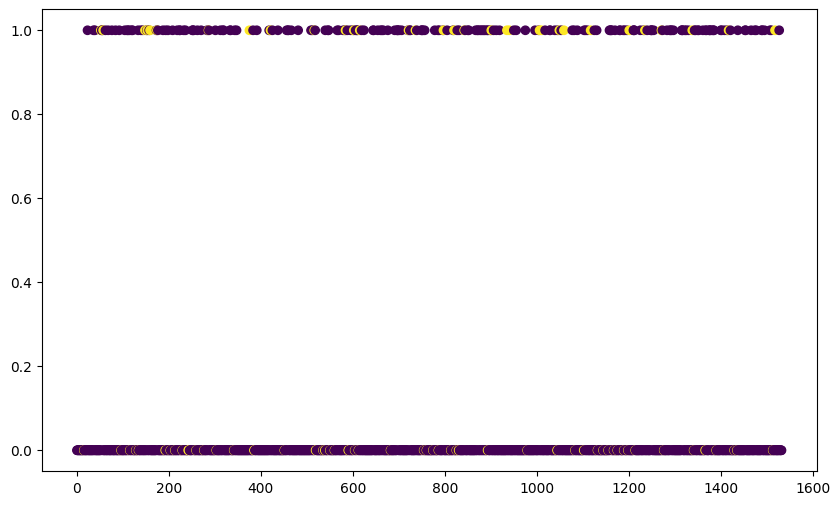

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select features for clustering
features = [col for col in stroke_data.columns if col != 'stroke']
X = stroke_data[features]

X_train, X_test, y_train, y_test = train_test_split(X, stroke_data['stroke'], test_size=0.3, random_state=42)

print(f"Shape of X_train:", {X_train.shape},{y_train.shape})
print(f"Shape of X_test:", {X_test.shape},{y_test.shape})

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predict cluster labels for the test set
y_pred = kmeans.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred)), y_pred,marker='o', c=y_test)
plt.show()

###KNN

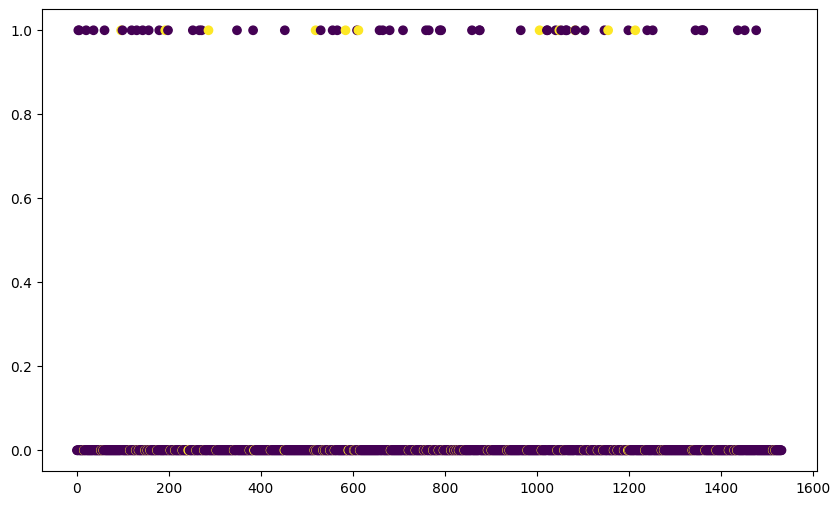

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred)), y_pred,marker='o', c=y_test)
plt.show()

###Linear Regression

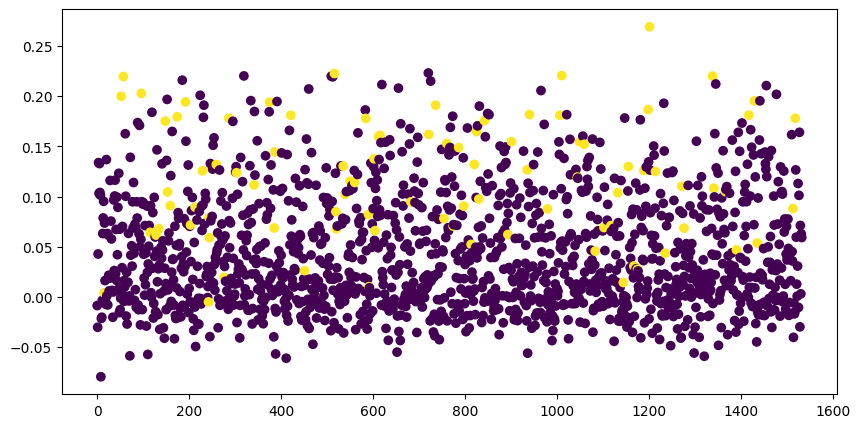

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(range(len(y_pred_lr)), y_pred_lr, marker='o', c=y_test)
plt.show()

###Watching correlations

<ipython-input-363-bb4646cab4eb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stroke_correlation.index, y=stroke_correlation.values, palette='viridis')


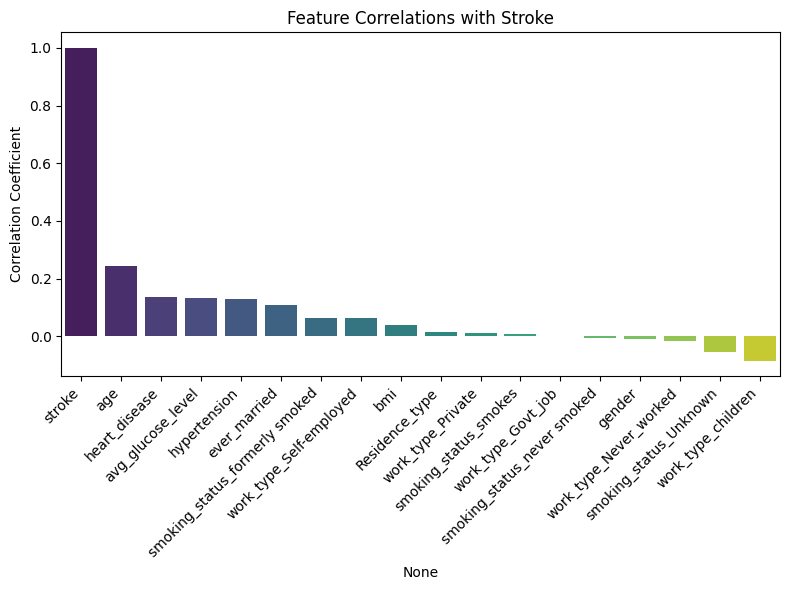

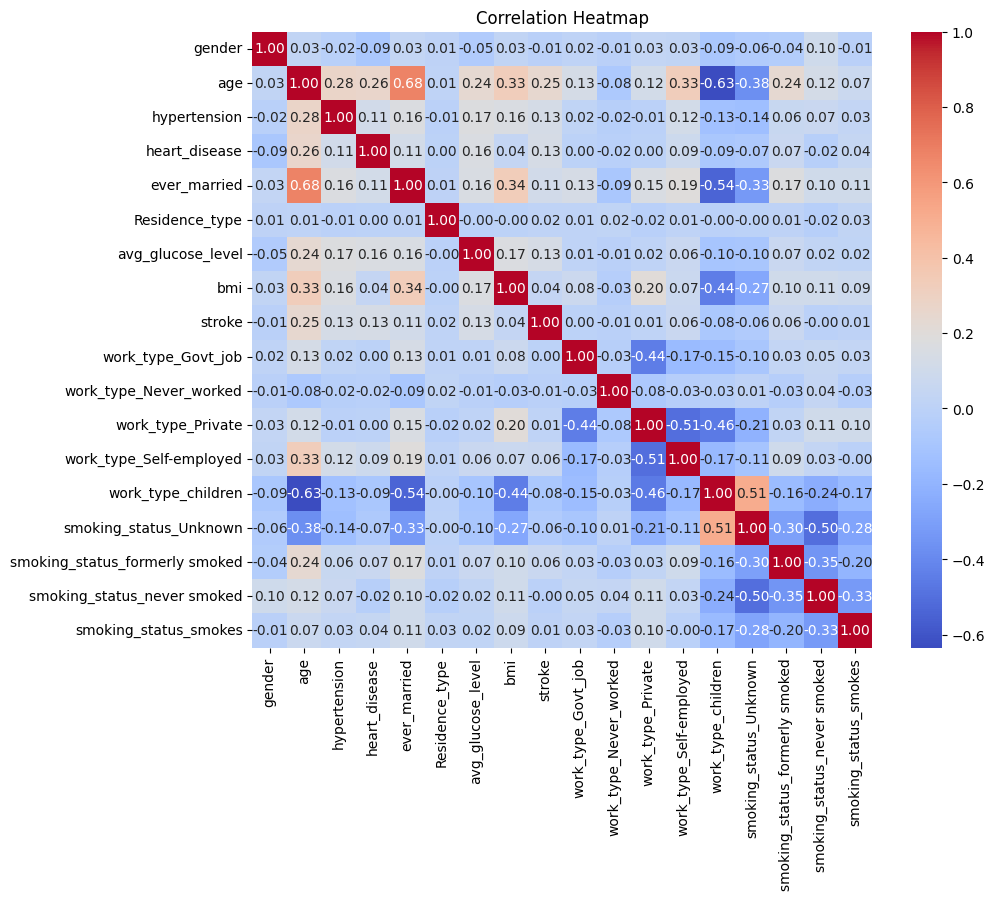

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = stroke_data.corr()

# Correlation with the 'stroke' feature
stroke_correlation = correlation_matrix['stroke'].sort_values(ascending=False)

# Plot the correlation of all features with 'stroke'
plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_correlation.index, y=stroke_correlation.values, palette='viridis')
plt.title('Feature Correlations with Stroke')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Heatmap for all features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap')
plt.show()


###Selecting features and creating train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the features and the feature to predict
features = [col for col in stroke_data.columns if col != 'stroke']
X = stroke_data[features]
y = stroke_data['stroke']

# Divide in train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###Using SMOTE to counter the imbalance on 'Stroke'

In [ ]:
!pip install imbalanced-learn

In [ ]:
# Apply SMOTE to counter imbalance of 'Stoke' feature
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'Male'

###Scaling the data

In [ ]:
# Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

###Hyperparameter tuning

In [ ]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model

def build_model(hp):
    input_layer = Input(shape=(X_train_resampled.shape[1], ))

    # First hidden layer
    hl1 = Dense(
        hp.Int("hl1_neurons", min_value=16, max_value=128, step=16),
        activation=hp.Choice('hl1_activation', values=['relu', 'tanh'])
    )(input_layer)
    dropout1 = Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1))(hl1)

    # Second hidden layer
    hl2 = Dense(
        hp.Int("hl2_neurons", min_value=8, max_value=64, step=8),
        activation=hp.Choice('hl2_activation', values=['relu', 'tanh'])
    )(dropout1)
    dropout2 = Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1))(hl2)

    # Output layer
    output_layer = Dense(1, activation='sigmoid')(dropout2)

    # Creating the model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
        loss='binary_crossentropy',  # Binary classification problem
        metrics=['accuracy']
    )
    return model

###Bayesian optimization

In [ ]:
from keras_tuner.tuners import BayesianOptimization

# Configuration of the Bayesian Optimization
bayesian_opt = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=20,  # More iterations for a better search
    executions_per_trial=2,
    directory='hyperparameter_search',
    project_name='stroke_prediction_tuning'
)

# Search of the best hiperparameters
bayesian_opt.search(X_train_resampled, y_train_resampled, epochs=30, validation_split=0.2, verbose=1)

# Print the best hyperparameters
best_hps = bayesian_opt.get_best_hyperparameters()[0]
print(f"Best found hyperparameters: {best_hps.values}")

Reloading Tuner from hyperparameter_search/stroke_prediction_tuning/tuner0.json
Best found hyperparameters: {'hl1_neurons': 128, 'hl1_activation': 'relu', 'dropout_1': 0.1, 'hl2_neurons': 8, 'hl2_activation': 'tanh', 'dropout_2': 0.30000000000000004, 'optimizer': 'adam'}


###Train the best model

In [ ]:
# Train the best model
best_model = bayesian_opt.hypermodel.build(best_hps)
history = best_model.fit(X_train_resampled, y_train_resampled, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7709 - loss: 0.4774 - val_accuracy: 0.8617 - val_loss: 0.3088
Epoch 2/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9255 - loss: 0.2239 - val_accuracy: 0.9115 - val_loss: 0.2115
Epoch 3/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9390 - loss: 0.1844 - val_accuracy: 0.9320 - val_loss: 0.1561
Epoch 4/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9454 - loss: 0.1655 - val_accuracy: 0.9378 - val_loss: 0.1498
Epoch 5/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9380 - loss: 0.1703 - val_accuracy: 0.9364 - val_loss: 0.1455
Epoch 6/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9442 - loss: 0.1590 - val_accuracy: 0.9386 - val_loss: 0.1452
Epoch 7/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9444 - loss: 0.1661 - val_accuracy: 0.9239 - val_loss: 0.1492
Epoch 8/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9487 - loss: 0.1471 - val_accu

###Plotting the model

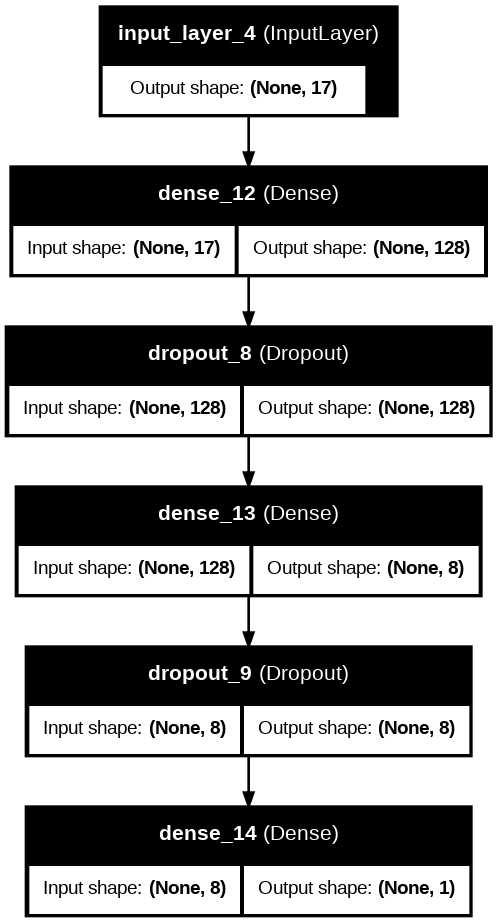

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your Keras or TensorFlow model
plot_model(
    best_model,
    to_file="model_plot.png",  # Save the model plot as an image file
    show_shapes=True,          # Display input/output shapes
    show_layer_names=True,     # Display layer names
    dpi=96                     # Set resolution for better quality
)

###Evaluating the model

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7977821265492498
F1 Score: 0.25120772946859904
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88      1444
           1       0.16      0.58      0.25        89

    accuracy                           0.80      1533
   macro avg       0.56      0.70      0.57      1533
weighted avg       0.92      0.80      0.85      1533



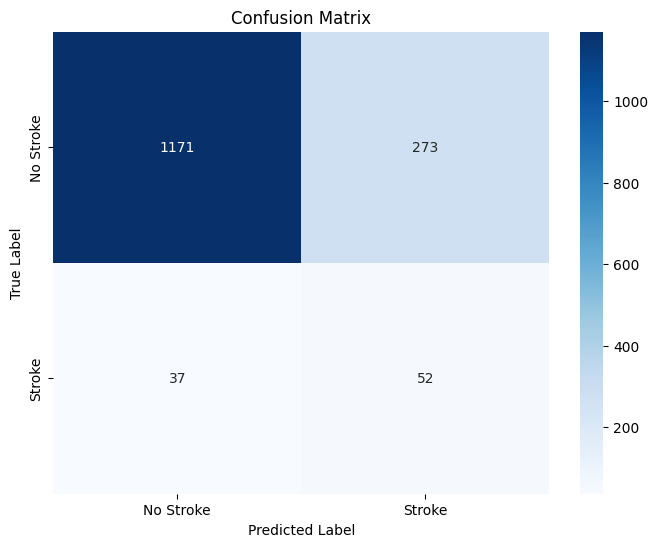

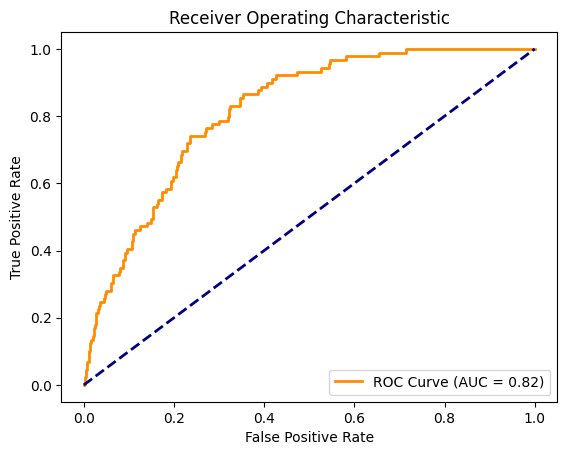

In [ ]:
# Evaluate the model
y_pred = best_model.predict(X_test).flatten()
y_pred_classes = (y_pred > 0.05).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("F1 Score:", f1_score(y_test, y_pred_classes))
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()